# 第6章 逻辑斯谛回归

配置环境：python 3.6

代码全部测试通过。

代码参考 : https://github.com/wzyonggege/statistical-learning-method/blob/master/LogisticRegression/LR.ipynb

此文档方便阅读，若需要复制粘贴可以在当前目录中查看`LR.py`

In [83]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [84]:
# 创建数据
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

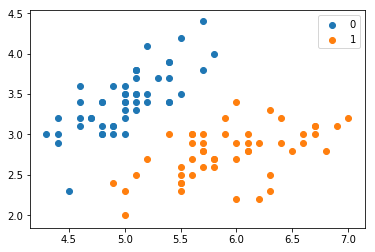

In [85]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [86]:
class LR:
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def load_data(self, X, y):
        self.X = X
        self.y = y.reshape((len(y), 1))

    def init_args(self):
        """
        初始化参数
        
        权重
        X 矩阵
        学习率
        迭代次数
        """
        self.X_matrix = []
        for x in self.X:
            self.X_matrix.append([1.0, *x])
        self.w = np.zeros((len(self.X_matrix[0]), 1))
        self.X_matrix = np.array(self.X_matrix)
        self.max_iters = 200
        self.lr = 0.01
        
    def train(self, lr=0.01, max_iters=200):
        self.lr = lr if lr else self.lr
        self.max_iters = max_iters if max_iters else self.max_iters 
        
        for t in range(self.max_iters):
            result = self.sigmoid(np.dot(self.X_matrix, self.w))
            # 误差
            error = self.y - result
            # 使用向量化的方法更新参数
            self.w += np.sum(self.lr * error * self.X_matrix, axis=0).reshape((3, 1))
        print('train done!')
        
        
    def score(self, X, y):
        X_matrix = []
        for x in X:
            X_matrix.append([1.0, *x])
        X = np.array(X_matrix)
        y = np.array(y)
        predict_y = self.sigmoid(np.dot(X, self.w))
        predict_y = [1 if i > 0.5 else 0 for i in predict_y]
        
        
        result = [1 if p == r else 0 for (p, r) in zip(predict_y, y)]
        
        return sum(result) / len(y)
        

In [87]:
lr_cls = LR()
lr_cls.load_data(X_train, y_train)
lr_cls.init_args()
lr_cls.train()

result = lr_cls.score(X_test, y_test)
print('分类结果', result)

train done!
分类结果 1.0
